In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from metrics import rmse_score, nnse_score, acc_score, psnr_score, mssim_score
from pytorch_msssim import MS_SSIM
from utils import SphericalNODataset, get_cr_dirs

In [2]:
data_path = '/Users/reza/Career/DMLab/SURROGATE/Data/psi_web_sample/test'

In [3]:
MSSSIM_MODULE = MS_SSIM(
    data_range=1.0,
    size_average=True,
    channel=1,  # after unsqueeze(1)
    spatial_dims=3,  # 3D input
    win_size=7,
    win_sigma=1.0,
)

In [4]:
cr_dirs = get_cr_dirs(data_path)
dataset = SphericalNODataset(data_path, cr_dirs)
climatology = dataset.climatology
print(climatology.shape)

Loading simulations: 100%|██████████| 24/24 [00:00<00:00, 103.94it/s]


torch.Size([139, 111, 128])


torch.Size([139, 111, 128])


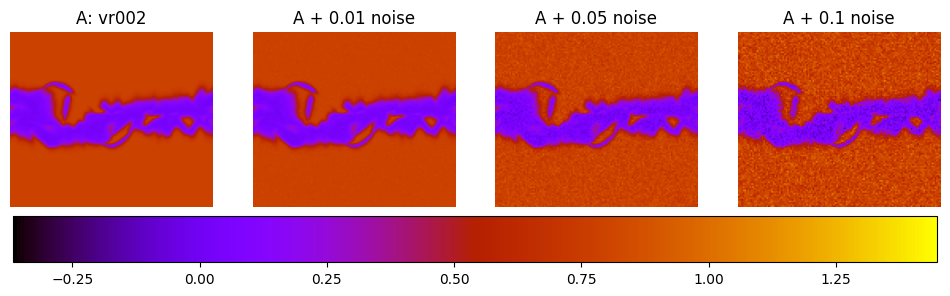

In [5]:
instance = dataset[0]
y = instance["y"]
print(y.shape)
noisy_1 = (y + 0.01 * np.random.randn(*y.shape)).to(torch.float32)
noisy_2 = (y + 0.05 * np.random.randn(*y.shape)).to(torch.float32)
noisy_3 = (y + 0.1 * np.random.randn(*y.shape)).to(torch.float32)

min_ = min(y.min(), noisy_1.min(), noisy_2.min(), noisy_3.min())
max_ = max(y.max(), noisy_1.max(), noisy_2.max(), noisy_3.max())

fig, axes = plt.subplots(1, 4, figsize=(12, 6))

axes[0].set_title("A: vr002")
axes[0].imshow(y[0, :, :], cmap="gnuplot", vmin=min_, vmax=max_)
axes[0].axis("off")

axes[1].set_title("A + 0.01 noise")
axes[1].imshow(noisy_1[0, :, :], cmap="gnuplot", vmin=min_, vmax=max_)
axes[1].axis("off")


axes[2].set_title("A + 0.05 noise")
axes[2].imshow(noisy_2[0, :, :], cmap="gnuplot", vmin=min_, vmax=max_)
axes[2].axis("off")


axes[3].set_title("A + 0.1 noise")
im = axes[3].imshow(noisy_3[0, :, :], cmap="gnuplot", vmin=min_, vmax=max_)

axes[3].axis("off")
fig.colorbar(im, ax=axes, orientation="horizontal", fraction=0.1, pad=0.02)

plt.show()

In [6]:
def test(dataset, i, noise_scale=0.01, k=0):
    instance = dataset[i]
    y = instance["y"]
    print(y.shape)
    noisy = (y + noise_scale * np.random.randn(*y.shape)).to(torch.float32)

    min_ = min(y.min(), noisy.min())
    max_ = max(y.max(), noisy.max())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(y[k, :, :], cmap="gnuplot", vmin=min_, vmax=max_)

    plt.subplot(1, 2, 2)
    plt.imshow(noisy[k, :, :], cmap="gnuplot", vmin=min_, vmax=max_)
    plt.show()

    y = y.unsqueeze(0)
    noisy = noisy.unsqueeze(0)
    rmse = rmse_score(y, noisy)
    print("RMSE:", rmse)
    nnse = nnse_score(y, noisy, dataset.climatology)
    print("NNSE:", nnse)
    acc = acc_score(y, noisy, dataset.climatology)
    print("ACC:", acc)
    psnr = psnr_score(y, noisy)
    print("PSNR:", psnr)
    mssim = mssim_score(MSSSIM_MODULE, y, noisy)
    print("MSSIM:", mssim)

torch.Size([139, 111, 128])


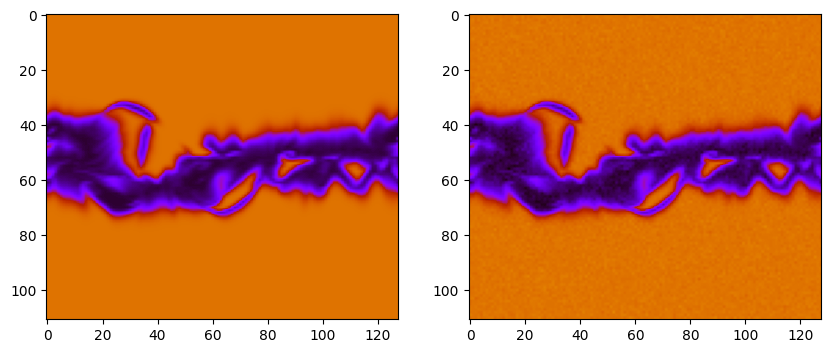

RMSE: 0.009987926110625267
NNSE: 0.9948055148124695
ACC: 0.9978679418563843
PSNR: 40.01049041748047
MSSIM: 0.9931409955024719


In [7]:
test(dataset, i=0, noise_scale=0.01)

torch.Size([139, 111, 128])


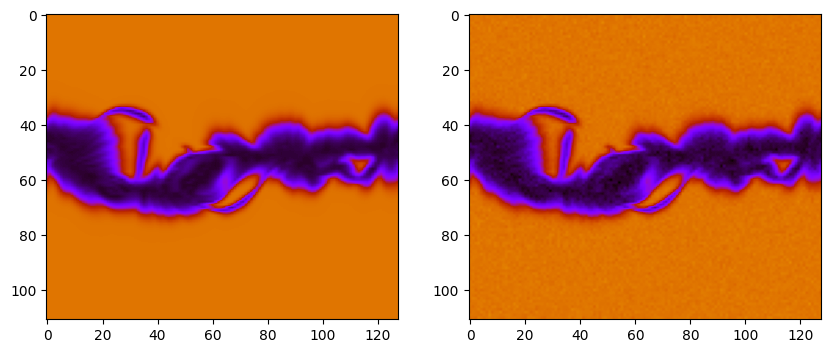

RMSE: 0.010003317147493362
NNSE: 0.9950941801071167
ACC: 0.9980068206787109
PSNR: 39.99711608886719
MSSIM: 0.9935385584831238


In [8]:
test(dataset, i=1, noise_scale=0.01)

torch.Size([139, 111, 128])


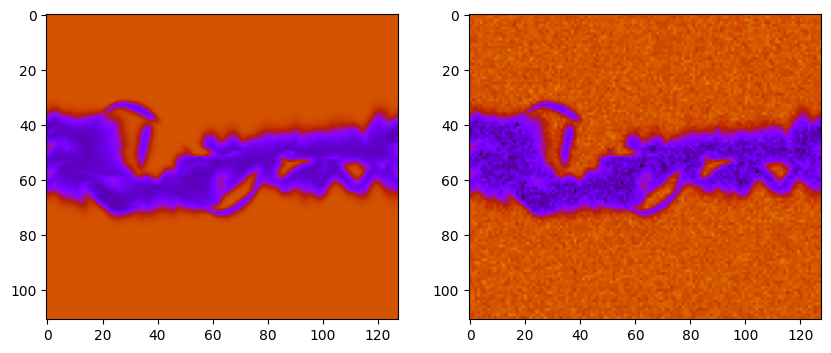

RMSE: 0.0499957837164402
NNSE: 0.8843035697937012
ACC: 0.9406261444091797
PSNR: 26.021331787109375
MSSIM: 0.9088015556335449


In [9]:
test(dataset, i=0, noise_scale=0.05)

torch.Size([139, 111, 128])


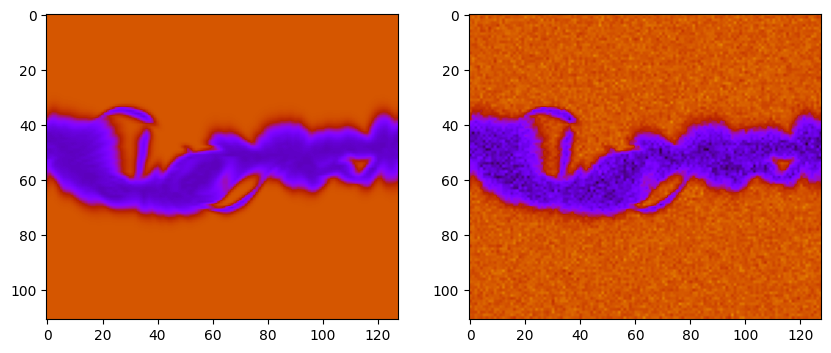

RMSE: 0.05000681057572365
NNSE: 0.8903128504753113
ACC: 0.9437834024429321
PSNR: 26.019418716430664
MSSIM: 0.9095466732978821


In [10]:
test(dataset, i=1, noise_scale=0.05)

torch.Size([139, 111, 128])


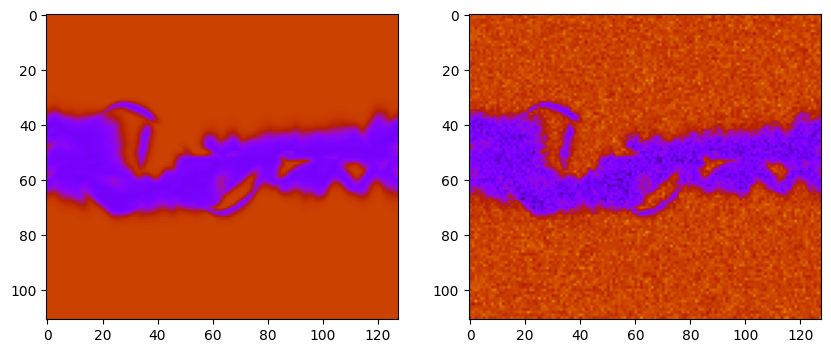

RMSE: 0.1000182181596756
NNSE: 0.6563348174095154
ACC: 0.8103346228599548
PSNR: 19.9984188079834
MSSIM: 0.7960571646690369


In [11]:
test(dataset, i=0, noise_scale=0.1)

torch.Size([139, 111, 128])


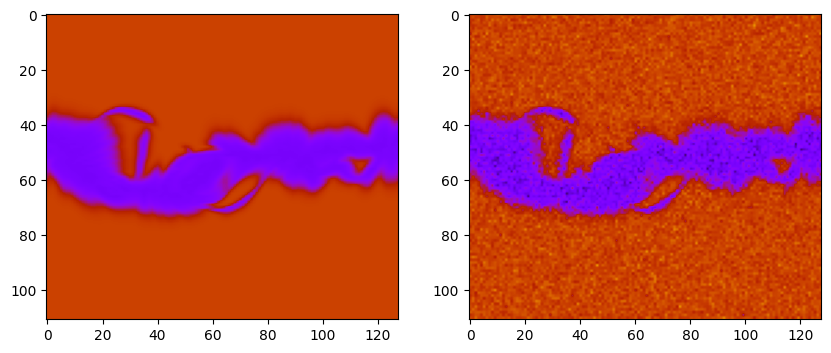

RMSE: 0.10002151131629944
NNSE: 0.6698458790779114
ACC: 0.8185177445411682
PSNR: 19.998132705688477
MSSIM: 0.7927331328392029


In [12]:
test(dataset, i=1, noise_scale=0.1)